In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import Isomap, LocallyLinearEmbedding,TSNE
from sklearn.decomposition import PCA,KernelPCA
df = pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [6]:
X = df.drop(["id","diagnosis"],axis=1)
y = df[["diagnosis"]]
sc = StandardScaler().set_output(transform="pandas")
X = sc.fit_transform(X)

def reduce_dimension(data: pd.DataFrame, method: str) -> pd.DataFrame:
    """
    Veriyi istenilen boyut indirgeme yöntemi ile 2 boyuta indirger.

    Parametreler:
    - data: Giriş verisi
    - method: Kullanılacak yöntem ("pca", "umap", "isomap", "tsne", "kernelpca", "lle")

    Çıktı:
    - 2 boyutlu veri
    """
    if method == "pca":
        model = PCA(n_components=2)
    elif method == "umap":
        model = umap.UMAP(n_components=2)
    elif method == "isomap":
        model = Isomap(n_components=2)
    elif method == "tsne":
        model = TSNE(n_components=2)
    elif method == "kernelpca":
        model = KernelPCA(n_components=2, kernel='rbf',gamma=0.001)  # Varsayılan olarak 'rbf' kernel'i kullanıldı.
    elif method == "lle":
        model = LocallyLinearEmbedding(n_components=2)
    else:
        raise ValueError(f"'{method}' is not a supported dimensionality reduction method.")

    transformed_data = model.fit_transform(data)
    reduced_df=pd.DataFrame(transformed_data, columns=['Component_1', 'Component_2'])
    return pd.concat([reduced_df,y],axis=1)

In [13]:
pca_df=reduce_dimension(X,"pca")
pca_df

,Component_1,Component_2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [9]:
df["diagnosis"]=="M"

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

In [10]:
df.loc[df["diagnosis"]=="M"]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [11]:
def plot_reduced_df(df,target:str):
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("comp1")
    ax.set_ylabel("comp2")
    ax.set_title(f"{target.capitalize()}")
    
    targets = list(df[target].unique())
    colors = ["r","b"]
    
    for t,color in zip(targets,colors):
        indices = df[target] ==t
        ax.scatter(df.loc[indices,"Component_1"],df.loc[indices,"Component_2"],c=color,s=50)
        
    ax.legend(targets)
    ax.grid()
    plt.show()

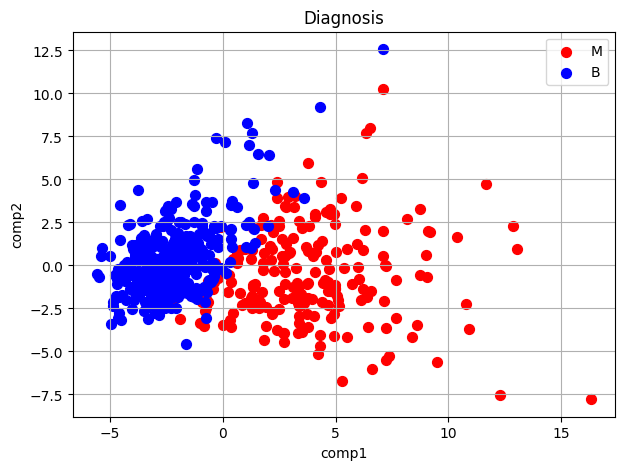

In [17]:
plot_reduced_df(pca_df,"diagnosis")

In [20]:
umap_df = reduce_dimension(X,"umap")
isomap_df = reduce_dimension(X,"isomap")
tsne_df = reduce_dimension(X,"tsne")
kernelpca_df = reduce_dimension(X,"kernelpca")
lle_df = reduce_dimension(X,"lle")

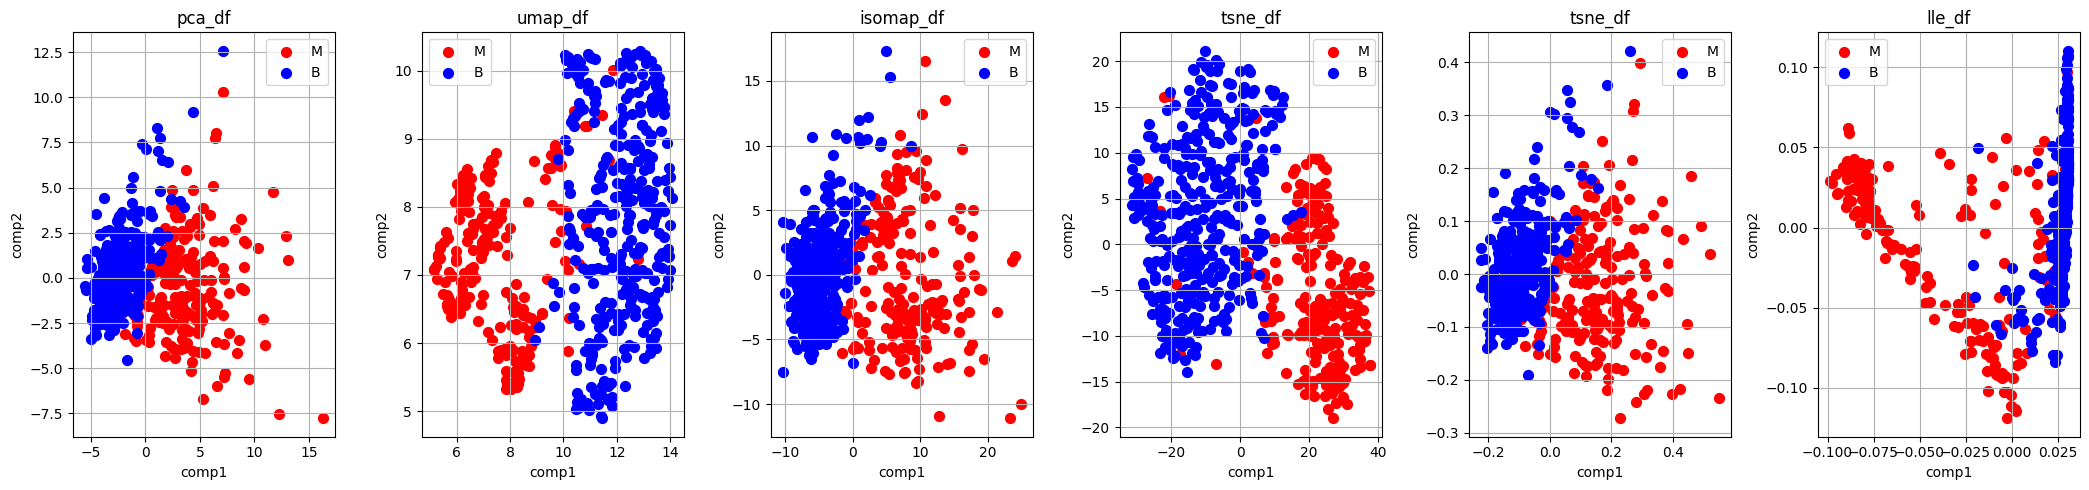

In [26]:
def plot_reduced_df(ax, df, target:str, title:str):
    ax.set_xlabel("comp1")
    ax.set_ylabel("comp2")
    ax.set_title(title)
    
    targets = list(df[target].unique())
    colors = ["r", "b"]
    
    for t, color in zip(targets, colors):
        indices = df[target] == t
        ax.scatter(df.loc[indices, "Component_1"], df.loc[indices, "Component_2"], c=color, s=50)
        
    ax.legend(targets)
    ax.grid()

def plot_multiple_dfs(df_list, titles, target):
    n = len(df_list)
    fig, axes = plt.subplots(1, n, figsize=(3.5*n, 5))  # n grafik için n subplot oluşturuyoruz.
    
    for i, df in enumerate(df_list):
        plot_reduced_df(axes[i], df, target, titles[i])
        
    plt.tight_layout()  # Grafiği daha okunabilir hale getirir.
    plt.show()

dfs = [pca_df, umap_df,isomap_df,tsne_df,kernelpca_df,lle_df]
titles = ["pca_df", "umap_df", "isomap_df","tsne_df","tsne_df","lle_df"]

plot_multiple_dfs(dfs,titles, "diagnosis")

In [27]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
X = df.drop(["Outcome"],axis=1)
y = df[["Outcome"]]
sc = StandardScaler().set_output(transform="pandas")
X = sc.fit_transform(X)

In [48]:
pca_df= reduce_dimension(X,"pca")
umap_df = reduce_dimension(X,"umap")
isomap_df = reduce_dimension(X,"isomap")
tsne_df = reduce_dimension(X,"tsne")
kernelpca_df = reduce_dimension(X,"kernelpca")
lle_df = reduce_dimension(X,"lle")

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [49]:
def plot_reduced_df(ax, df, target:str, title:str):
    ax.set_xlabel("comp1")
    ax.set_ylabel("comp2")
    ax.set_title(title)
    
    targets = list(df[target].unique())
    colors = ["r", "b"]
    
    for t, color in zip(targets, colors):
        indices = df[target] == t
        ax.scatter(df.loc[indices, "Component_1"], df.loc[indices, "Component_2"], c=color, s=50)
        
    ax.legend(targets)
    ax.grid()

def plot_multiple_dfs(df_list, titles, target):
    n = len(df_list)
    fig, axes = plt.subplots(1, n, figsize=(3.5*n, 5))  # n grafik için n subplot oluşturuyoruz.
    
    for i, df in enumerate(df_list):
        plot_reduced_df(axes[i], df, target, titles[i])
        
    plt.tight_layout()  # Grafiği daha okunabilir hale getirir.
    plt.show()


In [50]:
pca_df

,Component_1,Component_2,Outcome
0,1.068503,1.234895,1
1,-1.121683,-0.733852,0
2,-0.396477,1.595876,1
3,-1.115781,-1.271241,0
4,2.359334,-2.184819,1
...,...,...,...
763,1.562085,1.923150,0
764,-0.100405,-0.614181,0
765,-0.283475,0.097065,0
766,-1.060324,0.837062,1


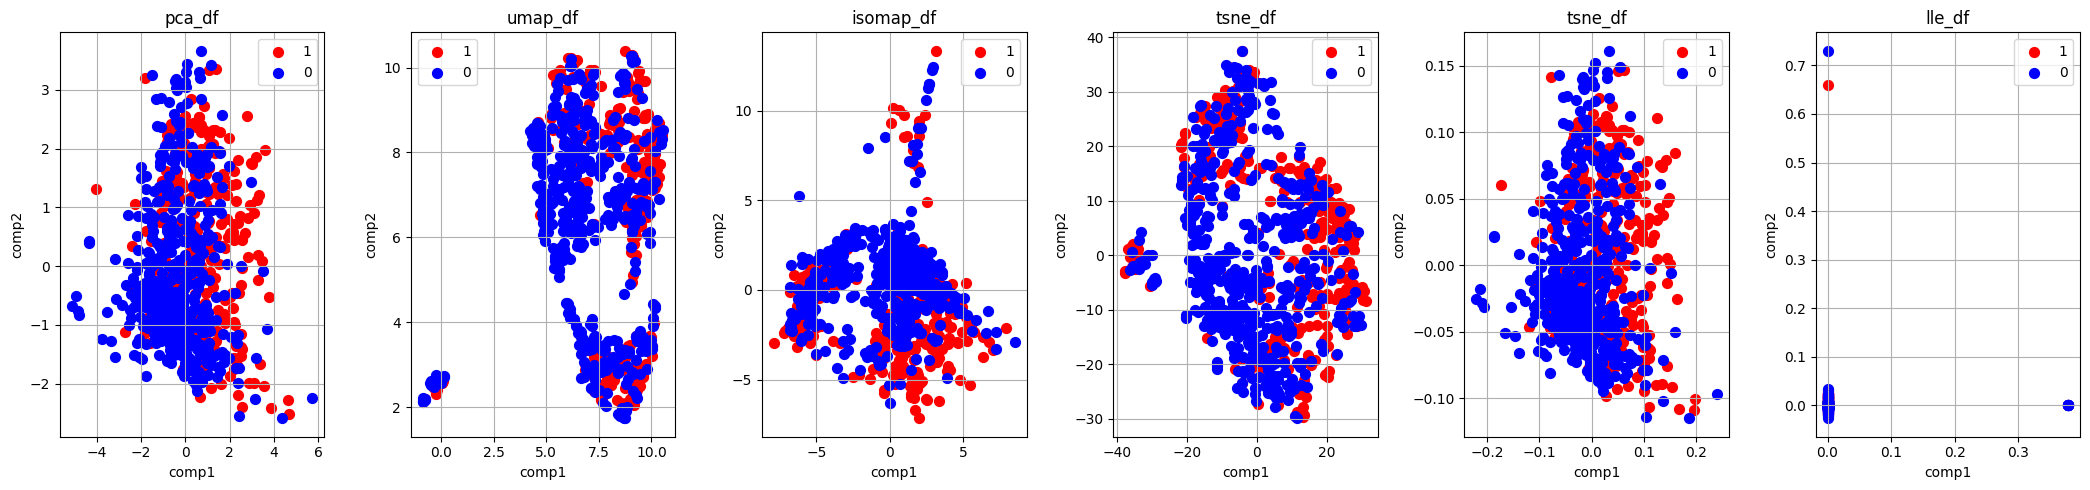

In [51]:
dfs = [pca_df, umap_df,isomap_df,tsne_df,kernelpca_df,lle_df]
titles = ["pca_df", "umap_df", "isomap_df","tsne_df","tsne_df","lle_df"]

plot_multiple_dfs(dfs,titles, "Outcome")